# Analyse de la solution de l'équation Energie Température dans une cellule diphasique

In [1]:
import sympy as sy

sy.init_printing()

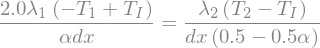

In [8]:
a1, Tg, T1, TI, T2, Td, dg, dd, d1, d2, dx = sy.symbols("alpha T_g T_1 T_I T_2 T_d d_g d_d d_1 d_2 dx")
lda1, lda2 = sy.symbols("lambda_1 lambda_2")
d1 = a1/2.*dx
d2 = (1-a1) / 2.*dx
dg = d1 + dx/2.
dd = d2 + dx/2.
gradT1 = (TI - T1)/d1
gradT2 = (T2 - TI)/d2
eq_lda = sy.Eq(lda1 * gradT1 , lda2 * gradT2)
eq_lda

In [9]:
e, cp1, cp2 = sy.symbols('e C_{p_1}, C_{p_2}')
eq_e = sy.Eq(cp1*a1*T1 + cp2*(1.-a1)*T2, e)
eq_e

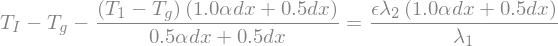

In [10]:
eps = sy.symbols('epsilon')
gradTg = (T1 - Tg)/dg
gradTd = (Td - T2)/dd
eq_relax1 = sy.Eq(TI - (Tg + gradTg * (d1+dg)), eps*lda2/lda1*(d1+dg))
eq_relax1

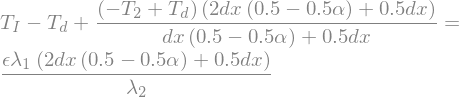

In [11]:
eq_relax2 = sy.Eq(TI - (Td - gradTd * (d2+dd)), eps*lda1/lda2*(d2+dd))
eq_relax2

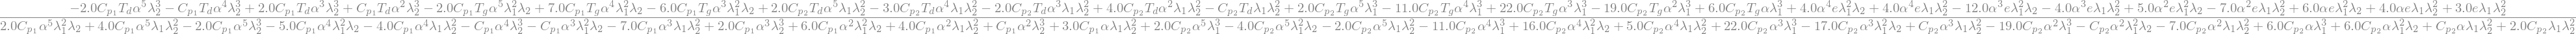

In [16]:
sol = sy.solve([eq_e, eq_lda, eq_relax1, eq_relax2], [TI, T1, T2, eps])
sol[TI]

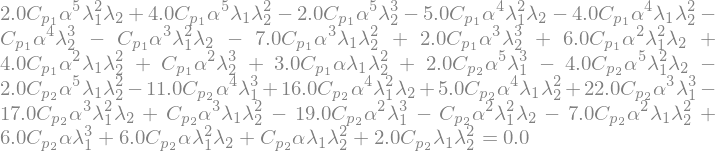

In [17]:
denom = sy.denom(sol[TI])
eq_sol = sy.Eq(denom, 0.)
eq_sol

In [26]:
sy.poly(denom, a1)

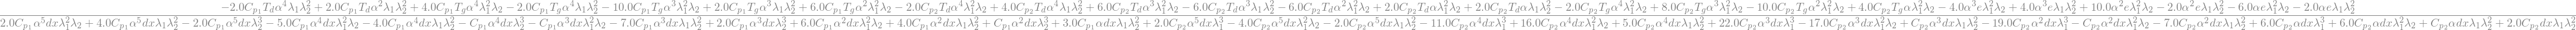

In [13]:
sol[eps]